# <h1><center>Counting number of people in public</center></h1> 
##  Abstract

Crowd analysis is one of the active research areas in recent years with wide range of applications.It can be used for public safety and security, the retail sector where counting can use an intelligence gathering tool for consumer shopping patterns, or to ensure normal operational conditions are maintained.Considering all these  applications,The goal of the project is to implement computer vision  techniques that can be used in counting number of people in a public place. The project proposes methods  that  can be  divided into mainly three categories; count by detection , count by tracking and count by statistical methods like regression.Counting by detection is done using trained Cascade classifier and HOG methods. Counting by tracking is performed using meanshift tracker with kalman filter and performing clustering the optical flow calculated using Lucas Kanade(KLT) tracker. Stastiscal methods such as linear regression and support vector refgression are also used in the project that models the foreground area of each frame  with the toal number of people present in that  frame. All these tecchniques were evaluated  using Mall dataset and are their results are compared. Among all the results method using linear regression gives the best accuracy.



## Introduction

Given an image, the objective of people counting is to correctly estimate the number of people in the scene. This is a topic with a number of practical applications. The knowledge of the number of people at certain places at certain time can foster vital business decisions. In public area, the knowledge of population density can be used to reduce congestion. Another field where people counting can be applied is in automatic hazard management. Areas that require low density crowd such as emergency exists can be automatically monitored; warnings can be provided when the area is above the density limit. 

Traditional counting systems are generally based on installing physical hardware such as infrared sensors or pressure sensors that are placed near to the entrance or exit. These  infrared people counting methods are based on the characteristics of the time continuous data collected by the sensors. They are generally low cost but not easy to integrate with video surveillance system.Recent advancements in the field of computer vision has led to techniques that can be used with realtime video analysis and are easy to integrate. 

In this report we discuss some of these computer vision techniques that can effectively be used in crowd counting without any integration costs.Our proposed methods can be divided into three categories; detection based, tracking based and statistical based counting techniques.These are discuss



## Proposed Methods

### Count by detection 

Two commonly used detection techniques  are implemented in the project: 1) Cascade Classifier and 2) Histograms of Gradients (HOG) that are based on the papers 'Real-Time Face Detection' by Viola Jones and 'Histograms of Oriented Gradients for Human Detection', by  Navneet Dalal and Bill Triggs respectively. 

##### Cascade Classifier:
Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones. In a nutshell, cascade classifier is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. Information collected from the output from a given classifier will be used as additional information for the classifier in the cascade which is then used to detect objects in other images.In ou project we have trained the classifier that detects head and shoulders of pedestrians.

##### Histogram of gradients(HOG) human detection:
HOG is a type of “feature descriptor”. The intent of a feature descriptor is to generalize the object in such a way that the same object (in this case a person) produces as close as possible to the same feature descriptor when viewed under different conditions. This makes the classification task easier.Features used in ths techniqe are global.It uses a sliding detection window which is moved around the image. At each position of the detector window, a HOG descriptor is computed for the detection window. This descriptor is then shown to the trained SVM, which classifies it as either “person” or “not a person”.

#### Implemetation:

<img src="Tayyab_blockdiagram_00.png">

The above block diagram shows the implementation. To implemetent both techniques openCV is used. OpenCV comes with builtin functions of cascade classifier that can be trained. In this case, we have  used already trained head and shoulder classifier. The function takes input the xml file theat has trained classifiers with trained values.In case of HOG technique,OpenCV library actually ships with a pre-trained HOG + Linear SVM detector based on the Dalal and Triggs method to automatically detect pedestrians in images.These both built in functions are used in the code below.In both the cases non maximum suppression is done to suppress the bounding boxes that overlap with a significant threshold. The dataset used is Mall dataset that comes with 2000 frames. For experimental purposes the 100 frames were tested.Run the code below to see demo.(You need to install imutils library first to run the code.This can be done using follwing command in command prompt,
'pip install imutils')



#### Cascade classifier code:

In [3]:
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import argparse
import cv2
 
cv2.namedWindow("cascade classifier") # Create a window
video_capture = cv2.VideoCapture('Images/Test/Tayyab_testimage_%2d.jpg') # Create a video capture object

if video_capture.isOpened(): # Check for validity
    capture_ready_flag, my_frame = video_capture.read()
else:
    capture_ready_flag = False

# initialize cascacade classifier detector
face_cascade = cv2.CascadeClassifier('Tayyab_xml_00.xml')


i=1
cascade_result =[]
while capture_ready_flag:
     
    orig = my_frame.copy()
 
    rects = face_cascade.detectMultiScale(my_frame, 1.3, 2)

    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])

    # draw the final bounding boxes
    k=0
    for (xA, yA, xB, yB) in rects:
        #cv2.rectangle(my_frame, (xA, yA), (xB, yB), (0, 255, 0), 2)
        cv2.putText(my_frame, "{}".format(str(k+1)), (int((xA+xB)/2), int((yA+yB)/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        k=k+1
    cv2.putText(my_frame, "count: {}".format(str(k)), (10, 50),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    cv2.imshow("cascade classifier", my_frame)
    capture_ready_flag, my_frame = video_capture.read()
    key = cv2.waitKey(100)
    print('frame '+str(i)+(':'),len(rects))
    cascade_result.append(len(rects))
   
    if key == 27: # exit on ESC
        break
    i = i+1
cascade_result = np.array(cascade_result)
print(cascade_result)
video_capture.release()
cv2.destroyWindow("cascade classifier")

frame 1: 7
frame 2: 13
frame 3: 14
frame 4: 13
frame 5: 11
frame 6: 12
frame 7: 7
frame 8: 10
frame 9: 8
frame 10: 5
frame 11: 7
frame 12: 5
frame 13: 13
frame 14: 17
frame 15: 15
frame 16: 12
frame 17: 10
frame 18: 10
frame 19: 9
frame 20: 6
frame 21: 12
frame 22: 13
frame 23: 10
frame 24: 10
frame 25: 9
frame 26: 13
frame 27: 15
frame 28: 12
frame 29: 19
frame 30: 10
frame 31: 9
frame 32: 6
frame 33: 5
frame 34: 9
frame 35: 7
frame 36: 9
frame 37: 10
frame 38: 9
frame 39: 9
frame 40: 7
frame 41: 5
frame 42: 3
frame 43: 4
frame 44: 3
frame 45: 9
frame 46: 4
frame 47: 6
frame 48: 5
frame 49: 5
frame 50: 2
frame 51: 6
frame 52: 6
frame 53: 8
frame 54: 7
frame 55: 7
frame 56: 4
frame 57: 4
frame 58: 7
frame 59: 4
frame 60: 6
frame 61: 7
frame 62: 9
frame 63: 8
frame 64: 10
frame 65: 10
frame 66: 12
frame 67: 10
frame 68: 7
frame 69: 11
frame 70: 9
frame 71: 6
frame 72: 6
frame 73: 7
frame 74: 7
frame 75: 7
frame 76: 8
frame 77: 6
frame 78: 5
frame 79: 4
frame 80: 6
frame 81: 3
frame 82: 

####  Histograms of Gradients (HOG) for human detection code:

In [4]:
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2

 
cv2.namedWindow("HOG") # Create a window
video_capture = cv2.VideoCapture('Images/Test/Tayyab_testimage_%2d.jpg') # Create a video capture object

if video_capture.isOpened(): # Check for validity
    capture_ready_flag, my_frame = video_capture.read()
else:
    capture_ready_flag = False

# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
i=1
HOG_result = []
while capture_ready_flag:
     
    # detect people in the image
    (rects, weights) = hog.detectMultiScale(my_frame, winStride=(2, 2),
    padding=(8, 8), scale=1.05)
 
        
 
    # apply non-maxima suppression to the bounding boxes using a
    # fairly large overlap threshold to try to maintain overlapping
    # boxes that are still people
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
 
    # draw the final bounding boxes
    k=0
    for (xA, yA, xB, yB) in pick:
        #cv2.rectangle(my_frame, (xA, yA), (xB, yB), (0, 255, 0), 2)
        cv2.putText(my_frame, "{}".format(str(k+1)), (int((xA+xB)/2), int((yA+yB)/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        k=k+1
    cv2.putText(my_frame, "count: {}".format(str(k)), (10, 50),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    cv2.imshow("HOG", my_frame)
    capture_ready_flag, my_frame = video_capture.read()
    print('frame '+str(i)+':',len(rects))
    HOG_result.append(len(rects))
    key = cv2.waitKey(100)
    if key == 27: # exit on ESC
        break
    i=i+1
video_capture.release()
cv2.destroyWindow("HOG")


frame 1: 18
frame 2: 15
frame 3: 15
frame 4: 13
frame 5: 13
frame 6: 14
frame 7: 17
frame 8: 14
frame 9: 9
frame 10: 14
frame 11: 11
frame 12: 14
frame 13: 15
frame 14: 11
frame 15: 13
frame 16: 17
frame 17: 18
frame 18: 12
frame 19: 14
frame 20: 16
frame 21: 16
frame 22: 19
frame 23: 10
frame 24: 12
frame 25: 13
frame 26: 16
frame 27: 20
frame 28: 19
frame 29: 14
frame 30: 17
frame 31: 16
frame 32: 13
frame 33: 19
frame 34: 14
frame 35: 12
frame 36: 15
frame 37: 8
frame 38: 10
frame 39: 12
frame 40: 14
frame 41: 9
frame 42: 9
frame 43: 12
frame 44: 11
frame 45: 10
frame 46: 12
frame 47: 13
frame 48: 10
frame 49: 13
frame 50: 11
frame 51: 6
frame 52: 10
frame 53: 9
frame 54: 12
frame 55: 15
frame 56: 10
frame 57: 8
frame 58: 8
frame 59: 9
frame 60: 7
frame 61: 9
frame 62: 13
frame 63: 8
frame 64: 12
frame 65: 13
frame 66: 15
frame 67: 12
frame 68: 12
frame 69: 15
frame 70: 14
frame 71: 15
frame 72: 10
frame 73: 6
frame 74: 10
frame 75: 5
frame 76: 7
frame 77: 7
frame 78: 5
frame 79: 7


### Count by tracking

The project proposes two approaches for counting people by tracking: 
* clustering of optical flow calulculated by KLT tracker.
* tracking multiple objects (humans/ pedestrians)  using meanshift tracker with kalman filter

#### Counting by clustering:
This method is based on research paper 'Counting crowded Moving Objects' by Vincent Rabaud and Serge Belongie. It has mainly two parts, tracking the trajectories and clustering. The tracking is done using KLT tracker and clustering part involves agglomerative clustering.

##### KLT tracker:

In its basic form, KLT tracker tries to determine the motion parameters (e.g., affine or pure translation) of local windows W from an image I to a consecutive image J. The centers of such windows define the tracked features. These motion paramenters gives us the trajectories of the features between video frames.

#####  Agglomerative clustering:
This is a "bottom up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.We start out with all sample units in n clusters of size 1.Then, at each step of the algorithm, the pair of clusters with the shortest distance are combined into a single cluster.The algorithm stops when all sample units are combined into a single cluster of size n.

##### Meanshift Tracker:
Meanshift is an algorithm that tracks objects by finding the maximum density of a discrete sample of a probability function (in our case, a region of interest in an image) and recalculating it at the next frame, which gives the algorithm an indication of the direction in which the object has moved. This calculation gets repeated until the centroid matches the original one, or remains unaltered even after consecutive iterations of the calculation.

##### Kalman filter:
The Kalman filter operates recursively on streams of noisy input data (which in computer vision is normally a video feed) to produce a statistically optimal estimate of the underlying system state (the position inside the video). It works in two phases:
Predict: In the first phase, the Kalman filter uses the covariance calculated up to the current point in time to estimate the object’s new position.
Update: In the second phase, it records the object’s position and adjusts the covariance for the next cycle of calculations
This way a better estimation of the object location will be obtained.


#### Implementation
In the implementation of the first  method in order to apply KLT tracker first  we have to find the features to be tracked.We have used ShiTomasi corner detection method for that. Opencv has function 'goodFeaturesToTrack()' the detects the corner point of all the pedestrians at each frame. Then KLT tracker is applied. Again openCV has a function for that. However after some time, KLT loses track of features for the following reasons: inter-object occlusion, self-occlusion, exit from the picture, and appearance change due to perspective and articulation. Therefore, new features need to be created.So after every 5 frames new features are detected using the same process. In next step we want to cluster the trajectories so the similar trajectories will belong to one cluster and hence the same object, person in our case. For clustering we use pythons scipy library.We set a threshold value in order to have similar trajectories belonging to same cluster hence same person. When we run the code below we can see numbers on each person's feature point.It can be observed that feature points of one person are marked by the same number. We can also see the trajectories of feature points. 
<img src="Tayyab_blockdiagram_02.png">

The second tracking method proposed in the project uses meanshift tracker with kalman filter to track the people and give a count. This method is based on paper ' Real Time Occlusion Handling Using Kalman Filter and Mean-Shift' (mentioned above). But isntead of using this method for single object, we use it to track multiple objects, people in our case.o the fist step is to use background subtractor , which lets us identify regions of interest corresponding to moving objects.Each region of interest corresponds to a person in that frame. After that the center of this region of interest(object)  is given to Kalman filter which  returns the object position in the frame with correction. This location will be fed into mean shift  algorithm and it will locate the object according to the Kalman calculations and simultaneously the object location will be stored in a limited size buffer.This process will continue till occlusion occurs. In case of occlusion first Kalman Filter predicts the next object location according to the history of the object trajectory. The output location will be fed to backprojected image of the frame for calculating the possibility of object presence. If the possibility of detecting the object becomes larger than a threshold, this location will be passed to mean shift  algorithm. Mean shift  will search the nearby locations for detecting the object. If measurement distance becomes higher than a threshold, then the occlusion is disappeared and mean shift  becomes the master tracker. Otherwise we should give this location to Kalman Filter to predict the next location according to the history of object movement.This process is repeated doen for all the objects(people). Each person object is created after 15 frames. We are assuming the people are out of sight after 15 frames. 
<img src="Tayyab_blockdiagram_01.png">

### count by KLT with clustering code:

In [5]:
import numpy as np
import cv2
import scipy.cluster.hierarchy as hcluster
from sklearn.metrics import mean_squared_error

cap = cv2.VideoCapture('Images/Test/Tayyab_testimage_%2d.jpg')

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 500,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
#p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)


frames=0
firstframe = True
points=None
cluster_count_result=[]
while(1):
    ret,frame = cap.read()
    print('............frame %d...........'%frames)
    if (ret is False):
        print ("failed to grab frame.")
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    
    
    
    if(frames%5==0 ):
        p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

    
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]
  
        
    # draw the tracks
    count = 0
    pp =[]
    
    firsrframe =False
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        if abs(a-c)>0.1 and abs(b-d)>0.1:
            pp.append([a,b])
            count=count+1
        
            mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
            frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    pp=np.array(pp)
    if(frames!=0 and ret==True):
        thresh = 30
        clusters = hcluster.fclusterdata(pp, thresh, criterion="distance")
        
        for c in range(0,len(clusters)):
            cv2.putText(frame, "{}".format(str(clusters[c])), (pp[c,0],pp[c,1]),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    
        total_count_frame = len(np.unique(clusters))
        cluster_count_result.append(total_count_frame)
        cv2.putText(frame, "count: {}".format(str(total_count_frame)), (10, 50),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        
        print('count: ',total_count_frame)
    img = cv2.add(frame,mask)
    #if frames==400:
        #break
    cv2.imshow('frame',img)
    k = cv2.waitKey(300) & 0xff
    if k == 27:
        break

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
    frames = frames+1
cluster_count_result = np.array(cluster_count_result)
print(cluster_count_result)
cap.release()
cv2.destroyAllWindows()


............frame 0...........
............frame 1...........
count:  17
............frame 2...........
count:  16
............frame 3...........
count:  12
............frame 4...........
count:  13
............frame 5...........
count:  10
............frame 6...........
count:  10
............frame 7...........
count:  15
............frame 8...........
count:  8
............frame 9...........
count:  18
............frame 10...........
count:  13
............frame 11...........
count:  17
............frame 12...........
count:  10
............frame 13...........
count:  11
............frame 14...........
count:  13
............frame 15...........
count:  9
............frame 16...........
count:  10
............frame 17...........
count:  9
............frame 18...........
count:  9
............frame 19...........
count:  9
............frame 20...........
count:  12
............frame 21...........
count:  8
............frame 22...........
count:  9
............frame 23...........
count: 

### count by mean shift and kalman filter code:

In [6]:
import cv2
import numpy as np
import os.path as path



def center(points):
    """calculating the centroids """
    x = (points[0][0] + points[1][0] + points[2][0] + points[3][0]) / 4
    y = (points[0][1] + points[1][1] + points[2][1] + points[3][1]) / 4
    return np.array([np.float32(x), np.float32(y)], np.float32)

font = cv2.FONT_HERSHEY_SIMPLEX

class Person():
  """Person class

  each pedestrian is composed of a ROI, an ID and a Kalman filter
  so we create a Person class to hold the object state
  """
  def __init__(self, id, frame, track_window):
    """init the pedestrian object with track window coordinates"""
    # set up the roi
    self.id = int(id)
    x,y,w,h = track_window
    self.track_window = track_window
    self.roi = cv2.cvtColor(frame[y:y+h, x:x+w], cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(self.roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
    roi_hist = cv2.calcHist([self.roi], [0], mask, [256], [0, 180])
    
    self.roi_hist = cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

    # set up the kalman
    self.kalman = cv2.KalmanFilter(4,2)
    self.kalman.measurementMatrix = np.array([[1,0,0,0],[0,1,0,0]],np.float32)
    self.kalman.transitionMatrix = np.array([[1,0,1,0],[0,1,0,1],[0,0,1,0],[0,0,0,1]],np.float32)
    self.kalman.processNoiseCov = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]],np.float32)
    self.measurement = np.array((2,1), np.float32) 
    self.prediction = np.zeros((2,1), np.float32)
    self.term_crit = ( cv2.TERM_CRITERIA_COUNT|cv2.TERM_CRITERIA_EPS,100,0.1)
    self.center = None
    self.updating(frame)
    
  def __del__(self):
    print ("Person %d destroyed" % self.id)

  def updating(self, frame):
  
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    back_project = cv2.calcBackProject([hsv],[0], self.roi_hist,[0,180],1)
   
   
    ret, self.track_window = cv2.meanShift(back_project, self.track_window, self.term_crit)
    x,y,w,h = self.track_window
   
    
    self.center = center([[x,y],[x+w, y],[x,y+h],[x+w, y+h]])  
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 255, 0), 2)

    
 
       
    self.kalman.correct(self.center)
    prediction = self.kalman.predict()
    #cv2.circle(frame, (int(prediction[0]), int(prediction[1])), 4, (255, 0, 0), -1)
    cv2.putText(frame, "{}".format(str(self.id+1)), (int(prediction[0]),int(prediction[1])),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    

def main():
  camera = cv2.VideoCapture("Tayyab_pets2009dataset_00.avi")
  history = 20
  # KNN background subtractor
  #bs = cv2.createBackgroundSubtractorKNN()
  # MOG subtractor
  bs = cv2.bgsegm.createBackgroundSubtractorMOG(history = history)
  bs.setHistory(history)
  cv2.namedWindow("meanshift and kalman")
  people = {}
  firstFrame = True
  frames = 0
  output = cv2.VideoWriter_fourcc(*'XVID')
  out = cv2.VideoWriter('output.avi',output, 20.0, (640,480))
  while True:
    print (" -------------------- FRAME %d --------------------" % frames)
    grabbed, frame = camera.read()
    if (grabbed is False):
      print ("failed to grab frame.")
      break

    fgmask = bs.apply(frame)

    # this is just to let the background subtractor build a bit of history
    if frames < history:
      frames += 1
      continue

    th = cv2.threshold(fgmask.copy(), 127, 255, cv2.THRESH_BINARY)[1]
    th = cv2.erode(th, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), iterations = 2)
    dilated = cv2.dilate(th, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8,3)), iterations = 2)
    image, contours, hier = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    counter = 0
    for c in contours:
      if cv2.contourArea(c) > 500:
        (x,y,w,h) = cv2.boundingRect(c)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 1)
        #retrack new people after every 15 frames
        if frames%10==0:
        #if firstFrame == True:
            people[counter] = Person(counter, frame, (x,y,w,h))
        counter += 1
    print('total people: ',counter)
   

    for i, p in people.items():
      p.updating(frame) 
    
    
    firstFrame = False
    frames += 1

    cv2.imshow("meanshift and kalman", frame)
    out.write(frame)
    
        
    if cv2.waitKey(100) & 0xff == 27:
        break
  out.release()
  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  main()

 -------------------- FRAME 0 --------------------
 -------------------- FRAME 1 --------------------
 -------------------- FRAME 2 --------------------
 -------------------- FRAME 3 --------------------
 -------------------- FRAME 4 --------------------
 -------------------- FRAME 5 --------------------
 -------------------- FRAME 6 --------------------
 -------------------- FRAME 7 --------------------
 -------------------- FRAME 8 --------------------
 -------------------- FRAME 9 --------------------
 -------------------- FRAME 10 --------------------
 -------------------- FRAME 11 --------------------
 -------------------- FRAME 12 --------------------
 -------------------- FRAME 13 --------------------
 -------------------- FRAME 14 --------------------
 -------------------- FRAME 15 --------------------
 -------------------- FRAME 16 --------------------
 -------------------- FRAME 17 --------------------
 -------------------- FRAME 18 --------------------
 -------------------- 

### Count by statistical method(Regression)

Despite the substantial progress being made in object detection and tracking in recent years, performing either in isolation or both reliably in a crowded environment remains a non-trivial problem. Counting by regression deliberately avoids actual segregation of individual or tracking of features but estimate the crowd density based on holistic and collective description of crowd patterns. Since neither explicit segmentation nor tracking of individual are involved, counting by regression becomes a feasible method for crowded environments where detection and tracking are severely limited.

#### Background subtraction:
Background subtraction is a common and widely used technique for generating a foreground mask (namely, a binary image containing the pixels belonging to moving objects in the scene) by using static cameras.It calculates the foreground mask performing a subtraction between the current frame and a background model, containing the static part of the scene or, more in general, everything that can be considered as background given the characteristics of the observed scene.Background modeling consists of two main steps: Background Initialization and Background Update.In the first step, an initial model of the background is computed, while in the second step that model is updated in order to adapt to possible changes in the scene.

#### Linear Regression:
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

#### SVR:
The idea of SVR is based on the computation of a linear regression function in a high dimensional feature space where the input data are mapped via a nonlinear function. SVR has been applied in various fields – time series and financial (noisy and
risky) prediction, approximation of complex engineering analyses, convex quadratic programming and choices of loss functions, etc.

### Implementation:
<img src="Tayyab_blockdiagram_03.png">
First extract low-level features such as foreground pixels and edge features from each video frame. Background subtraction technique is used.Opencv fi=unction 'MOG2()' is used that models the foreground mask.Consequently, a linear regression model is used to establish a direct mapping between the foreground area  and the actual people counts. For linear regression sklearn python library is used.Training of linear regression model is based on 100 frames.

In the second method is a variant of the first method, instead of using linear regression we use SVR (support vector regression). Again sklearn library is used with training of 100 frames.

Below are the working code of both. Run to see the demo.

### count by linear regression code:

In [7]:
import cv2
import numpy as np
import os.path as path
import argparse
import scipy.io
from sklearn import linear_model,svm
import matplotlib.pyplot as plt
from sklearn.svm import SVR

def display(predict):
    frames =0
    print('in display')
    camera2 = cv2.VideoCapture("Images/Test/Tayyab_testimage_%2d.jpg")
    cv2.namedWindow("linear Regression")
    while 1:
        print()
        grabbed, frame = camera2.read()
        
        if (grabbed is False):
            print ("failed to grab frame.")
            break
        fgmask = bs.apply(frame)   
        th = cv2.threshold(fgmask.copy(), 127, 255, cv2.THRESH_BINARY)[1]
        th = cv2.erode(th, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), iterations = 2)
        dilated = cv2.dilate(th, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8,3)), iterations = 2)/255.
        #image, contours, hier = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        cv2.putText(frame, "count: {}".format(str(predict[frames,0])), (10, 50),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        frames=frames+1
        cv2.imshow("linear Regression",frame)
        if cv2.waitKey(300) & 0xff == 27:
            break
        
    camera.release()
    
    
np.set_printoptions(threshold=np.inf)
camera = cv2.VideoCapture("Images/Train/Tayyab_trainimage_%2d.jpg")
g_t = scipy.io.loadmat('Tayyab_groundtruth_00.mat')
g_t = g_t.get('count')[20:100]
print('initial: ',g_t)

print(g_t.shape)
history = 20

# MOG subtractor
bs = cv2.bgsegm.createBackgroundSubtractorMOG(history = history)
bs.setHistory(history)

firstFrame = True
frames = 0

total =[]
test = []
while 1:
    print (" -------------------- FRAME %d --------------------" % frames)
    grabbed, frame = camera.read()
    if (grabbed is False):
        print ("failed to grab frame.")
        break

    fgmask = bs.apply(frame)
    

    # this is just to let the background subtractor build a bit of history
    if frames < history:
        frames += 1
        continue
   

    th = cv2.threshold(fgmask.copy(), 127, 255, cv2.THRESH_BINARY)[1]
    th = cv2.erode(th, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), iterations = 2)
    dilated = cv2.dilate(th, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8,3)), iterations = 2)/255.
    #image, contours, hier = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    t= np.sum(dilated)
    if frames<100:
        total.append([t])
    if frames>=100:
        test.append([t])
    
    #firstFrame = False
    frames += 1

  
    
        
    if cv2.waitKey(1000) & 0xff == 27:
        break
#out.release()
total = np.array(total)
test = np.array(test)
print('test: ',total.shape)

# Create linear regression object
regr = linear_model.LinearRegression()




# Train the model using the training sets




regr.fit(total,g_t)
predict_linear = np.floor(regr.predict(test)).astype(int)
print('ans linaer regression: ',predict_linear)

#print('svm: ',ans2)


camera.release()
display(predict_linear)
cv2.destroyAllWindows()

initial:  [[38]
 [37]
 [40]
 [41]
 [37]
 [41]
 [41]
 [41]
 [36]
 [33]
 [35]
 [36]
 [37]
 [36]
 [35]
 [36]
 [33]
 [31]
 [30]
 [29]
 [27]
 [24]
 [25]
 [21]
 [22]
 [19]
 [17]
 [17]
 [18]
 [17]
 [17]
 [16]
 [16]
 [17]
 [16]
 [19]
 [22]
 [22]
 [20]
 [21]
 [23]
 [18]
 [23]
 [23]
 [22]
 [24]
 [24]
 [25]
 [20]
 [23]
 [26]
 [26]
 [25]
 [23]
 [22]
 [20]
 [16]
 [18]
 [17]
 [17]
 [16]
 [15]
 [15]
 [17]
 [16]
 [16]
 [16]
 [14]
 [15]
 [13]
 [18]
 [18]
 [16]
 [18]
 [20]
 [19]
 [24]
 [25]
 [27]
 [31]]
(80, 1)
 -------------------- FRAME 0 --------------------
 -------------------- FRAME 1 --------------------
 -------------------- FRAME 2 --------------------
 -------------------- FRAME 3 --------------------
 -------------------- FRAME 4 --------------------
 -------------------- FRAME 5 --------------------
 -------------------- FRAME 6 --------------------
 -------------------- FRAME 7 --------------------
 -------------------- FRAME 8 --------------------
 -------------------- FRAME 9 ------------

### count by SVR code:

In [8]:
import cv2
import numpy as np
import os.path as path
import argparse
import scipy.io
from sklearn import linear_model,svm
import matplotlib.pyplot as plt
from sklearn.svm import SVR

def display(predict):
    frames =0
    print('in display')
    camera2 = cv2.VideoCapture("Images/Test/Tayyab_testimage_%2d.jpg")
    cv2.namedWindow("SVR")
    while 1:
        print()
        grabbed, frame = camera2.read()
        
        if (grabbed is False):
            print ("failed to grab frame.")
            break
        fgmask = bs.apply(frame)   
        th = cv2.threshold(fgmask.copy(), 127, 255, cv2.THRESH_BINARY)[1]
        th = cv2.erode(th, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), iterations = 2)
        dilated = cv2.dilate(th, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8,3)), iterations = 2)/255.
        #image, contours, hier = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        cv2.putText(frame, "count: {}".format(str(predict[frames])), (10, 50),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        frames=frames+1
        cv2.imshow("SVR",frame)
        if cv2.waitKey(300) & 0xff == 27:
            break
        
    camera.release()
    
    
np.set_printoptions(threshold=np.inf)
camera = cv2.VideoCapture("Images/Train/Tayyab_trainimage_%2d.jpg")
g_t = scipy.io.loadmat('Tayyab_groundtruth_00.mat')
g_t = g_t.get('count')[20:100]
print('initial: ',g_t)

print(g_t.shape)
history = 20

# MOG subtractor
bs = cv2.bgsegm.createBackgroundSubtractorMOG(history = history)
bs.setHistory(history)

firstFrame = True
frames = 0

total =[]
test = []
while 1:
    print (" -------------------- FRAME %d --------------------" % frames)
    grabbed, frame = camera.read()
    if (grabbed is False):
        print ("failed to grab frame.")
        break

    fgmask = bs.apply(frame)
    

    # this is just to let the background subtractor build a bit of history
    if frames < history:
        frames += 1
        continue
   

    th = cv2.threshold(fgmask.copy(), 127, 255, cv2.THRESH_BINARY)[1]
    th = cv2.erode(th, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), iterations = 2)
    dilated = cv2.dilate(th, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8,3)), iterations = 2)/255.
    #image, contours, hier = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    t= np.sum(dilated)
    if frames<100:
        total.append([t])

    if frames>=100:
        test.append([t])
    
    #firstFrame = False
    frames += 1

    #cv2.imshow("Report2", dilated)
    #out.write(frame)
    
        
    if cv2.waitKey(1000) & 0xff == 27:
        break
#out.release()
total = np.array(total)
test = np.array(test)
print('test: ',total.shape)

# Create SVR regression object

svr = SVR(kernel='linear', C=1)


# Train the model using the training sets


y =g_t.flatten()
svr_predict = np.floor(svr.fit(total, y).predict(test))
svr_predict= np.abs(svr_predict).astype(int)

print(svr_predict)
#print('svm: ',ans2)


camera.release()
display(svr_predict)
cv2.destroyAllWindows()

initial:  [[38]
 [37]
 [40]
 [41]
 [37]
 [41]
 [41]
 [41]
 [36]
 [33]
 [35]
 [36]
 [37]
 [36]
 [35]
 [36]
 [33]
 [31]
 [30]
 [29]
 [27]
 [24]
 [25]
 [21]
 [22]
 [19]
 [17]
 [17]
 [18]
 [17]
 [17]
 [16]
 [16]
 [17]
 [16]
 [19]
 [22]
 [22]
 [20]
 [21]
 [23]
 [18]
 [23]
 [23]
 [22]
 [24]
 [24]
 [25]
 [20]
 [23]
 [26]
 [26]
 [25]
 [23]
 [22]
 [20]
 [16]
 [18]
 [17]
 [17]
 [16]
 [15]
 [15]
 [17]
 [16]
 [16]
 [16]
 [14]
 [15]
 [13]
 [18]
 [18]
 [16]
 [18]
 [20]
 [19]
 [24]
 [25]
 [27]
 [31]]
(80, 1)
 -------------------- FRAME 0 --------------------
 -------------------- FRAME 1 --------------------
 -------------------- FRAME 2 --------------------
 -------------------- FRAME 3 --------------------
 -------------------- FRAME 4 --------------------
 -------------------- FRAME 5 --------------------
 -------------------- FRAME 6 --------------------
 -------------------- FRAME 7 --------------------
 -------------------- FRAME 8 --------------------
 -------------------- FRAME 9 ------------

### Experimental  Results
All the above mentioned techniques are tested on Mall dataset except for meanshift tracker with kalman filter technique which is tested on PETS 2009 dataset just for demenstration purposes(since it does not perform in crowded places we have not used it in our evalution results).Fig1 below(next cell) gives the performance of all the methods used, evaluated using root mean square error(RMSE) and mean absolute error(MAE).

For counting by detection methods the input is in the form test of  frames since both cascade classifier and HOG based human detection are pretrained. Thay are tested on 100 frames. The output  as shown in the demo gives us the total count per frame on top left corner of the window  and displays a number count on individual person on that particular frame. Biggest problem faced for both the techniques is occlusion as they perform poorly in the presece of occlusion. HOG svm trained classifier performs little better but is slow compared to cascade classifier. Both have high RMSE and MAE.This is shown in the table below.

For counting by clustered klt agorithm, the output is little different.The total count is displayed on the left top corner of the window as before but rather than marking individual person on the frame, each feature is marked. Similar feature that move with coherent trajectories are marked with same numbers denoting they are belong to same cluster and hence same person. Moreover their trajectories are also shown.Although this tracking based method performs well in presence of occlusion, however the challenge faced with this technique is that  trajectories are nonhomegeneous, they start and end at different times that makes it difficult to cluster which gives rise to inaccurate results.In addition to this we assume it only considers people who are moving, static people are not counted. Their RMSE and MAE IS 15.74 AND 15.3 respectively which is higher.

We have not evaluted tracking technique based on meanshift tracker with kalman filter since it performed poorly when tested for Mall datset. For demeonstration purposes we have tested on PETS 2009 dataset which has less occlusion and is less dense than Mall dataset.

Counting using Linear Regression technique provided the best results with RMSE and MAE 4.75 and 3.91 respectively, the lowest of all as shown in the table below. However, when we use SVR instead of linear regression the model performs poorly.

Fig2. show the graph plotted for people count per frame and can be compared with the ground truth.We can see linear regression based method is closest to the ground truth and thus has the best performance.


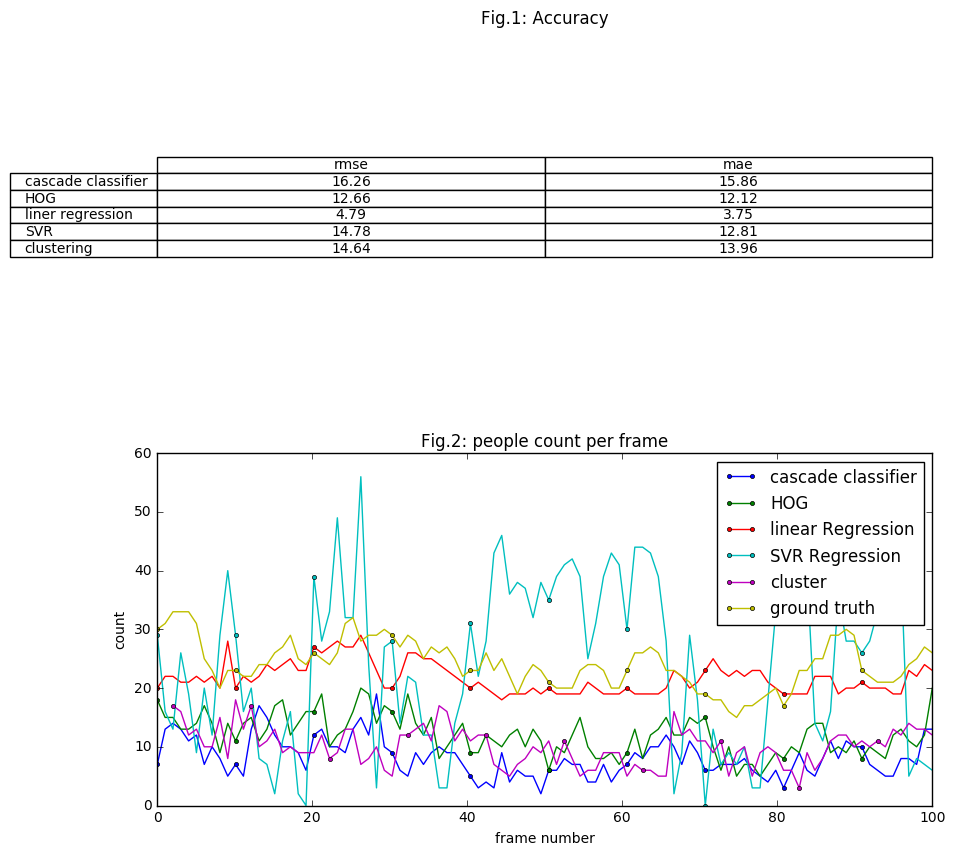

In [9]:
import scipy.io
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import math
g_t = scipy.io.loadmat('Tayyab_groundtruth_00.mat')
g_truth = g_t.get('count')[101:201]
g_truth_cluster = g_t.get('count')[103:201]

#calculating rmse and mae
rms_cascade = np.sqrt(mean_squared_error(g_truth,cascade_result ))
rms_HOG = np.sqrt(mean_squared_error(g_truth,HOG_result ))
rms_linear_regression = np.sqrt(mean_squared_error(g_truth,predict_linear ))
rms_svr_regression = np.sqrt(mean_squared_error(g_truth,svr_predict ))
rms_cluster = np.sqrt(mean_squared_error(g_truth_cluster,cluster_count_result))

mae_cascade =  mean_absolute_error(g_truth,cascade_result)
mae_HOG = mean_absolute_error(g_truth,HOG_result )
mae_linear_regression = mean_absolute_error(g_truth,predict_linear)
mae_svr_regression = mean_absolute_error(g_truth,svr_predict )
mae_cluster = mean_absolute_error(g_truth_cluster,cluster_count_result)

#forming data and plotting ccuracy table and graph
data = np.array([[rms_cascade,mae_cascade],[rms_HOG,mae_HOG],[rms_linear_regression,mae_linear_regression],[rms_svr_regression,
        mae_svr_regression],[rms_cluster,mae_cluster]])
data = np.around(data,2)
fig,axs =plt.subplots(2,1,figsize=(10,10))
collabel=("rmse", "mae")
rowlabel =('cascade classifier','HOG','liner regression','SVR','clustering') 
axs[0].axis('off')
the_table = axs[0].table(cellText= data,rowLabels=rowlabel,colLabels=collabel,loc='center',cellLoc='center')
x = np.linspace(0,100,100)

cascade = axs[1].plot(x,cascade_result,label='cascade classifier',marker='o',markevery=10, markersize=3)
HOG = axs[1].plot(x,HOG_result,label='HOG',marker='o',markevery=10, markersize=3)
linearRegression = axs[1].plot(x,predict_linear,label='linear Regression',marker='o',markevery=10,markersize=3)
SVRregression  =  axs[1].plot(x,svr_predict,label='SVR Regression',marker='o',markevery=10,markersize=3)
clustering =  axs[1].plot(x[2:100],cluster_count_result,label='cluster',marker='o',markevery=10,markersize=3)
groundTruth =  axs[1].plot(x,g_truth,'-',label='ground truth',marker='o',markevery=10,markersize=3)
axs[0].set_title('Fig.1: Accuracy')
axs[1].legend(loc='upper right')
axs[1].set_xlabel('frame number')
axs[1].set_ylabel('count')
axs[1].set_title('Fig.2: people count per frame')
plt.show()



### Conclusion

In this paper we proposed different methods for counting number of people in a public place. These methods included detection based techniques like cascade classifier and trained HOG, tracking based methods like clustered KLT and regression based statistical techniques. All these methods were evaluated using Mall Dataset and counting method based on linear regression gave the best results.




### References
* P. Viola and M. Jones. 2001. Robust Real-time Object
  Detection. International Journal of Computer Vision 4. pp 51-52.
*  N. Dalal and B. Triggs. 2005. Histograms of oriented
   gradients for human detection. In: IEEE Conference
   on Computer Vision and Pattern Recognition. pp.
   886–893.
* R. Panahi, I. Gholampour and M. Jamzad, "Real time occlusion handling using Kalman Filter and mean-shift," 2013 8th Iranian     Conference on Machine Vision and Image Processing (MVIP), Zanjan, 2013, pp. 320-323.
* J. Xu, Q. Wu, J. Zhang, B. Silk, G. T. Ngo and Z. Tang, "Efficient People Counting with Limited Manual Interferences," 2014     International Conference on Digital Image Computing: Techniques and Applications (DICTA), Wollongong, NSW, 2014, pp. 1-6.
* X. Liu, P. H. Tu, J. Rittscher, A. Perera and N. Krahnstoever, "Detecting and counting people in surveillance applications,"     IEEE Conference on Advanced Video and Signal Based Surveillance, 2005., 2005, pp. 306-311.
* Counting crowded moving objects
  V Rabaud, S Belongie - Computer Vision and Pattern Recognition, 2006 IEEE
* Jamieson, M., Siva, P., Shafiee, M.J., & Wong, A. (2016). Scene Invariant Crowd Segmentation and Counting Using Scale-         Normalized Histogram of Moving Gradients (HoMG).
* G. phadke, "Robust multiple target tracking under occlusion using fragmented mean shift and Kalman filter," 2011 International Conference on Communications and Signal Processing, Kerala, 2011, pp. 517-521.
* From Semi-Supervised to Transfer Counting of Crowds 
  C. C. Loy, S. Gong, and T. Xiang in Proceedings of IEEE International Conference on Computer Vision, pp. 2256-2263, 2013
* Crowd Counting and Profiling: Methodology and Evaluation C. C. Loy, K. Chen, S. Gong, T. Xiang 
  in S. Ali, K. Nishino, D. Manocha, and M. Shah (Eds.), Modeling, Simulation and Visual Analysis of Crowds, Springer, vol. 11,   pp. 347-382, 2013 